In [13]:
!pip install pytorch-pretrained-bert

In [14]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel, BertForMaskedLM

import matplotlib.pyplot as plt
%matplotlib inline

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [15]:
import json
import pandas as pd
from os.path import join, exists
from collections import OrderedDict

def load_json(filename: str,filepath: str = '',date_time_tag: str = '',ext: str = ".json",
              show_path: bool = False) -> OrderedDict:
    file_loc = join(filepath,date_time_tag + filename + ext)
    if show_path:
        print("Reading JSON file: [{}]".format(file_loc))
    if exists(join(filepath,date_time_tag + filename + ext)):
        try:
            with open(file_loc, encoding="utf-8") as file:
                json_dict = json.load(file)
                json_dict = OrderedDict(json_dict)
                # json_dict = OrderedDict(json.load(file))
            file.close()
            return json_dict
        except Exception as e:
            print("Could not open file as JSON: [{}]. \n Reason:[{}]".format(file_loc,e))
            with open(file_loc, encoding="utf-8") as file:
                json_dict = str(file)
                json_dict = json.loads(json_dict)
                # json_dict = OrderedDict(json_dict)
            return json_dict
    else:
        print("File does not exist at: [{}]".format(file_loc))
        return False

def json2df(filename = "smerp_labeled_validation",dataset_dir=""):
    catid2cattxt_map = load_json(filename=filename,filepath=dataset_dir)
    idxs, tweets, labels = [], [], []
    for idx in catid2cattxt_map.keys():
        idxs.append(idx)
        tweets.append(catid2cattxt_map[idx]["parsed_tweet"])
        labels.append(catid2cattxt_map[idx]["classes"])

    df = pd.DataFrame.from_dict({"idx"    :idxs,
                                    "tweets"   :tweets,
                                    "labels":labels})
    df = df[~df['tweets'].isna()]
    df.to_csv(path_or_buf=join(dataset_dir,filename + "_df.csv"))
    print("Data shape = {} ".format(df.shape))
    return df

df = json2df()
df.head()

Data shape = (566, 3) 


,idx,tweets,labels
0,768744566203768832,earthquake italy 267 dead hundreds injured,[2]
1,768822900812046340,dlusvideonews montepulciano damages earthquake...,[2]
2,768848577225428992,italy quake young girl found alive rubble leas...,"[0, 3]"
3,769138472636469248,new post national disaster italy quake death t...,[2]
4,769113679073800193,number dead italy quake climbs first funerals ...,[2]


In [16]:
test_size = 0.2
test_length = int(df.shape[0] * test_size)
test_df_bert = df.iloc[-test_length:,:]
print(test_df_bert.shape)
test_df_bert.reset_index(drop=True,inplace=True)
test_df_bert.head(2)

(113, 3)


,idx,tweets,labels
0,769138316700622848,cnbc number dead italy quake climbs first fune...,[2]
1,768462568834801665,carolcnn earthquake proof houses anywhere best...,[2]


In [17]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
spacy_en = spacy.load("en_core_web_sm")
# Isnt required here as already cleaned dataset

In [18]:
def tokenizer_spacy(input_text: str,remove_stopwords=False):
    input_text = spacy_en(input_text)
    tokens = []
    for token in input_text:
        if remove_stopwords and token.text in STOP_WORDS:
            continue
        tokens.append(token.text)
    return tokens

In [19]:
import nltk
nltk.download('all')
import re

from spacy.lang.en.stop_words import STOP_WORDS
# all_stops = set(STOP_WORDS) | set(string.punctuation)
def clean_txt(txt):
    txt = re.sub('[^A-Za-z0-9 ]+', '', txt)
    txt = [token for token in nltk.word_tokenize(txt) if token.lower() not in STOP_WORDS]
#     logger.debug(type(txt))
#     logger.debug(txt)
    txt = " ".join(txt)
#     logger.debug(type(txt))
#     logger.debug(txt)
    return txt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/shreyas/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading p

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to /home/shreyas/nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /home/shreyas/nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_dat

In [20]:
df["tweets"] = df["tweets"].apply(clean_txt)
df["tweets"]

0             earthquake italy 267 dead hundreds injured
1      dlusvideonews montepulciano damages earthquake...
2      italy quake young girl found alive rubble 240 ...
3      new post national disaster italy quake death t...
4      number dead italy quake climbs funerals held i...
                             ...                        
561    urlurl canadian dead italys earthquake canadia...
562    dead toll rises italy earthquake 120 reported ...
563    mayor amatrice italy says quakedamaged city ne...
564    usgs estimated significant casualties likely e...
565    death toll italyearthquake 250 365 people inju...
Name: tweets, Length: 566, dtype: object

In [21]:
def add_spl_tokens(tweets):
    return "[CLS] " + tweets + " [SEP]"

In [22]:
txts_tokens = []
txts_segment_ids = []
indexed_tokens = []
i=0
max_len = 0
max_tokens = []
for txt in df["tweets"]:
    txt_cleaned = add_spl_tokens(txt)
    txt_tokens = tokenizer.tokenize(add_spl_tokens(txt))
    if len(txt_tokens) >512: 
        i+=1
        if len(txt_tokens) > max_len: 
            max_len = len(txt_tokens)
            max_tokens = txt_tokens
        txt_tokens = txt_tokens[:512]
    txts_tokens.append(txt_tokens)
    txt_segment_ids = [1] * len(txt_tokens)
    txts_segment_ids.append(txt_segment_ids)
    txt_tokens_ids = tokenizer.convert_tokens_to_ids(txt_tokens)
    indexed_tokens.append(txt_tokens_ids)

In [23]:
print("Documnets with more than 512 tokens:[{}]".format(i))
print("max_len: [{}]".format(max_len))
print("max_tokens: [{}]".format(max_tokens))

Documnets with more than 512 tokens:[0]
max_len: [0]
max_tokens: [[]]


In [24]:
for tup in zip(txts_tokens[0], indexed_tokens[0]):
    print(tup)

('[CLS]', 101)
('earthquake', 8372)
('italy', 3304)
('267', 25491)
('dead', 2757)
('hundreds', 5606)
('injured', 5229)
('[SEP]', 102)


In [25]:
tokens_tensor = torch.tensor([indexed_tokens[0]])
segments_tensors = torch.tensor([txts_segment_ids[0]])
print(tokens_tensor)
print(segments_tensors)

tensor([[  101,  8372,  3304, 25491,  2757,  5606,  5229,   102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1]])


In [26]:
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): BertLayerNorm()
    (dropout): Dropout(p=0.1)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): BertLayerNorm()
            (dropout): Dropout(p=0.1)
          )
        )
        (intermediate): BertIntermediate(
          (dense): Linear(in_features=768, out_features=3072, bias=

In [27]:
for txt_tokens_ids,txt_segment_ids in zip(indexed_tokens,txts_segment_ids):
    tokens_tensor = torch.tensor([txt_tokens_ids])
    segments_tensors = torch.tensor([txt_segment_ids])
#     logger.info(tokens_tensor)
#     logger.info(segments_tensors)
#     logger.info(tokens_tensor.shape, segments_tensors.shape)
    assert tokens_tensor.shape == segments_tensors.shape, "shape does not match"
    with torch.no_grad():
        encoded_layers, _ = model(tokens_tensor, segments_tensors)
        
    print("Number of layers: [{}]".format(len(encoded_layers)))
    layer_i = 0

    print("Number of batches: [{}]".format(len(encoded_layers[layer_i])))
    batch_i = 0

    print("Number of tokens: [{}]".format(len(encoded_layers[layer_i][batch_i])))
    token_i = 0

    print("Number of hidden units: [{}]".format(len(encoded_layers[layer_i][batch_i][token_i]),"\n"))

Number of layers: [12]
Number of batches: [1]
Number of tokens: [8]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [18]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [33]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [20]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [25]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [18]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [20]
Number of hidden units: [768]
Number of l

Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [10]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [12]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [7]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [25]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [21]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [21]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of l

Number of layers: [12]
Number of batches: [1]
Number of tokens: [16]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [16]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [17]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [23]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [16]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [16]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of 

Number of layers: [12]
Number of batches: [1]
Number of tokens: [14]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [13]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [18]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [6]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [18]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [21]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [20]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [26]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [13]
Number of hidden units: [768]
Number of l

Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [23]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [21]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [7]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [24]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [8]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [18]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [28]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [11]
Number of hidden units: [768]
Number of la

Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [17]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [22]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [19]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [7]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [9]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [17]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [22]
Number of hidden units: [768]
Number of la

Number of layers: [12]
Number of batches: [1]
Number of tokens: [15]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [14]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [24]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [16]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [13]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [11]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [13]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [12]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [21]
Number of hidden units: [768]
Number of layers: [12]
Number of batches: [1]
Number of tokens: [26]
Number of hidden units: [768]
Number of 

In [28]:
list(tokenizer.vocab.keys())[5000:5020]

['knight',
 'lap',
 'survey',
 'ma',
 '##ow',
 'noise',
 'billy',
 '##ium',
 'shooting',
 'guide',
 'bedroom',
 'priest',
 'resistance',
 'motor',
 'homes',
 'sounded',
 'giant',
 '##mer',
 '150',
 'scenes']

torch.Size([19, 768])


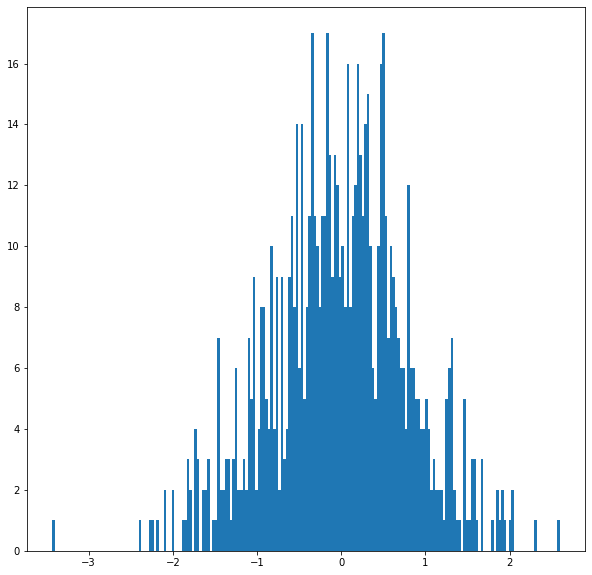

In [29]:
token_i = 6
batch_i = 0
layer_i = 6

print(encoded_layers[layer_i][0].shape)

vec = encoded_layers[layer_i][batch_i][token_i]
# print(vec)

plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [30]:
print(len(txts_tokens[1]))
print(txts_tokens[1])
token_embeddings = []
for token_i in range(len(txts_tokens[2])):
    hidden_layers = [] 
    for layer_i in range(len(encoded_layers)):
        print(layer_i,batch_i,token_i)
        print(encoded_layers[layer_i][batch_i].shape)
        vec = encoded_layers[layer_i][batch_i][token_i]    
        hidden_layers.append(vec)
    token_embeddings.append(hidden_layers)

# Sanity check the dimensions:
print ("Number of tokens in sequence:", len(token_embeddings))
print ("Number of layers per token:", len(token_embeddings[0]))

18
['[CLS]', 'dl', '##us', '##vid', '##eon', '##ew', '##s', 'monte', '##pu', '##lc', '##iano', 'damages', 'earthquake', 'images', 'come', 'regions', 'italy', '[SEP]']
0 0 0
torch.Size([19, 768])
1 0 0
torch.Size([19, 768])
2 0 0
torch.Size([19, 768])
3 0 0
torch.Size([19, 768])
4 0 0
torch.Size([19, 768])
5 0 0
torch.Size([19, 768])
6 0 0
torch.Size([19, 768])
7 0 0
torch.Size([19, 768])
8 0 0
torch.Size([19, 768])
9 0 0
torch.Size([19, 768])
10 0 0
torch.Size([19, 768])
11 0 0
torch.Size([19, 768])
0 0 1
torch.Size([19, 768])
1 0 1
torch.Size([19, 768])
2 0 1
torch.Size([19, 768])
3 0 1
torch.Size([19, 768])
4 0 1
torch.Size([19, 768])
5 0 1
torch.Size([19, 768])
6 0 1
torch.Size([19, 768])
7 0 1
torch.Size([19, 768])
8 0 1
torch.Size([19, 768])
9 0 1
torch.Size([19, 768])
10 0 1
torch.Size([19, 768])
11 0 1
torch.Size([19, 768])
0 0 2
torch.Size([19, 768])
1 0 2
torch.Size([19, 768])
2 0 2
torch.Size([19, 768])
3 0 2
torch.Size([19, 768])
4 0 2
torch.Size([19, 768])
5 0 2
torch.Size(

In [31]:
token_vecs_cat = []
token_vecs_sum = []

for token in token_embeddings:
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), 0)
    token_vecs_cat.append(cat_vec)
    sum_vec = torch.sum(torch.stack(token)[-4:], 0)
    token_vecs_sum.append(sum_vec)

print('Concatenated vector shape is: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))
print('Sum vector shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

Concatenated vector shape is: 19 x 3072
Sum vector shape is: 19 x 768


In [32]:
sentence_embedding = torch.mean(encoded_layers[11], 1)
print ("Our final sentence embedding vector of shape:"), sentence_embedding[0].shape[0]

Our final sentence embedding vector of shape:


(None, 768)

In [33]:
label_cols = ["0", "1", "2", "3"]

In [37]:
from fast_bert.prediction import BertClassificationPredictor

MODEL_PATH = 'bert-base-uncased'

predictor = BertClassificationPredictor(
				model_path=MODEL_PATH,
				label_path="labels", # location for labels.csv file
				multi_label=True,
				model_type='bert',
				do_lower_case=False)


# Batch predictions
texts = df['tweets'].tolist()

multiple_predictions = predictor.predict_batch(texts)


In [ ]:
print(multiple_predictions)

In [36]:
print(texts)

0             earthquake italy 267 dead hundreds injured
1      dlusvideonews montepulciano damages earthquake...
2      italy quake young girl found alive rubble 240 ...
3      new post national disaster italy quake death t...
4      number dead italy quake climbs funerals held i...
                             ...                        
561    urlurl canadian dead italys earthquake canadia...
562    dead toll rises italy earthquake 120 reported ...
563    mayor amatrice italy says quakedamaged city ne...
564    usgs estimated significant casualties likely e...
565    death toll italyearthquake 250 365 people inju...
Name: tweets, Length: 566, dtype: object


In [11]:
print(single_prediction)

[('0', 0.5682485103607178)]


In [47]:
def predict(model, path, test_filename='smerp_labeled_validation_df.csv'):
#     predict_processor = model(path)
#     test_examples = predict_processor.get_test_examples(path, test_filename, size=-1)
    
#     # Hold input data for returning it 
#     input_data = [{ 'id': input_example.guid, 'comment_text': input_example.text_a } for input_example in test_examples]

#     test_features = convert_examples_to_features(
#         test_examples, label_list, args['max_seq_length'], tokenizer)
    
#     logger.info("***** Running prediction *****")
#     logger.info("  Num examples = %d", len(test_examples))
#     logger.info("  Batch size = %d", args['eval_batch_size'])
    
#     all_input_ids = torch.tensor([f.input_ids for f in test_features], dtype=torch.long)
#     all_input_mask = torch.tensor([f.input_mask for f in test_features], dtype=torch.long)
#     all_segment_ids = torch.tensor([f.segment_ids for f in test_features], dtype=torch.long)

#     test_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids)
    
#     # Run prediction for full data
#     test_sampler = SequentialSampler(test_data)
#     test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=args['eval_batch_size'])
    
    all_logits = None
    
#     model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    for step, batch in enumerate(txts_tokens):
#         input_ids, segment_ids = batch
#         input_ids = input_ids.to(device)
#         input_mask = input_mask.to(device)
#         segment_ids = segment_ids.to(device)

        with torch.no_grad():
            logits = model(batch)
            logits = logits.sigmoid()

        if all_logits is None:
            all_logits = logits.detach().cpu().numpy()
        else:
            all_logits = np.concatenate((all_logits, logits.detach().cpu().numpy()), axis=0)
            
        nb_eval_examples += input_ids.size(0)
        nb_eval_steps += 1

    return pd.merge(pd.DataFrame(input_data), pd.DataFrame(all_logits, columns=label_list), left_index=True, right_index=True)



In [48]:
result = predict(model, "/")

TypeError: ones_like() received an invalid combination of arguments - got (list), but expected one of:
 * (Tensor input, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (Tensor input, bool requires_grad)
